In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the preprocessed data
X_train = pd.read_csv('X_train.csv', index_col=0)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0).values.ravel()
y_test = pd.read_csv('y_test.csv', index_col=0).values.ravel()

In [4]:
# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [5]:
# Make predictions
predictions = model.predict(X_test)

In [6]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.00021075048389814367
Mean Absolute Error: 0.010387580836607806
Root Mean Squared Error: 0.014517247807285775
R-squared Score: 0.9554752326155276


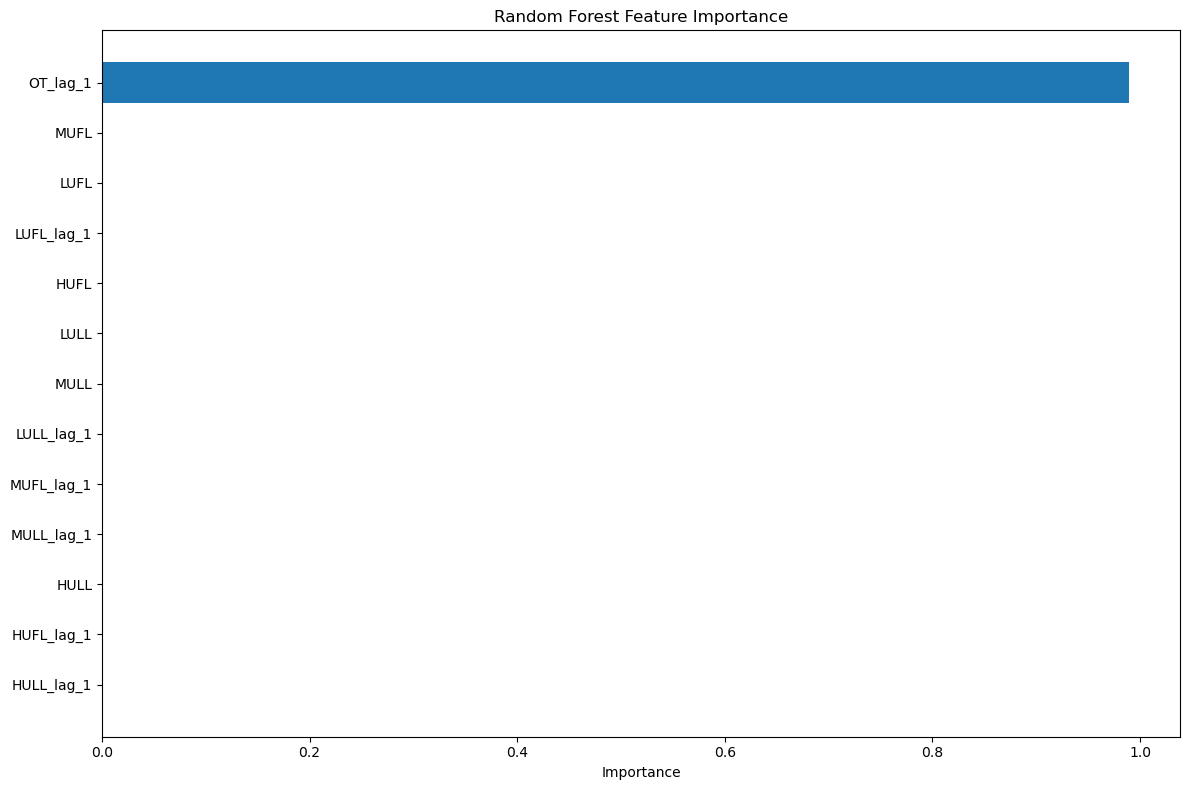

In [7]:
# Plot feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

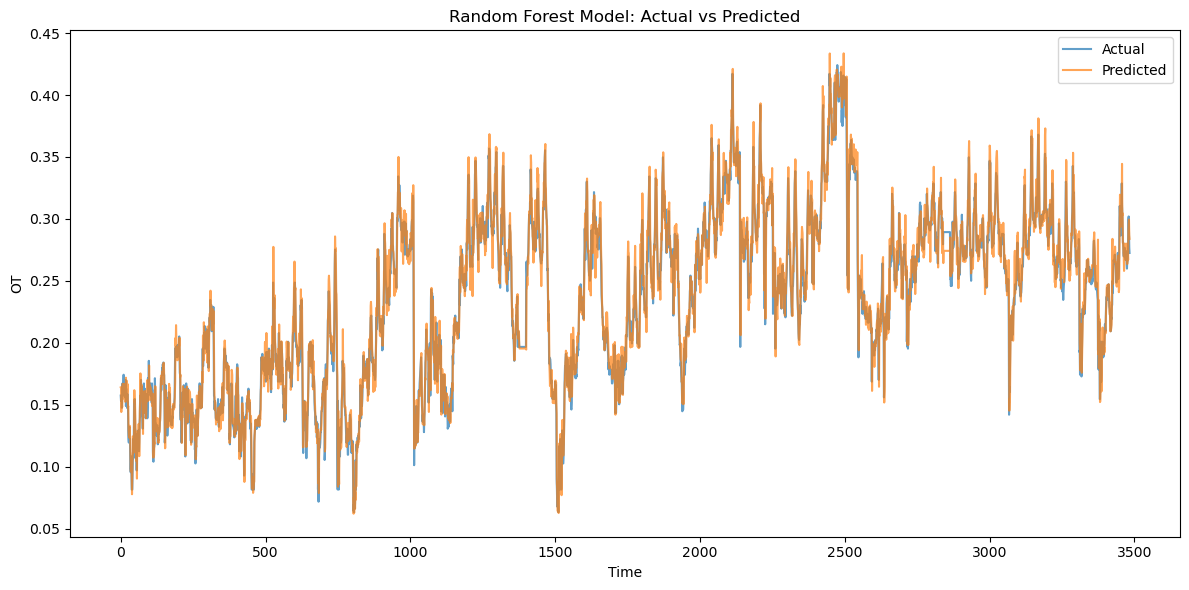

In [8]:
# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', alpha=0.7)
plt.plot(predictions, label='Predicted', alpha=0.7)
plt.title('Random Forest Model: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('OT')
plt.legend()
plt.tight_layout()
plt.show()

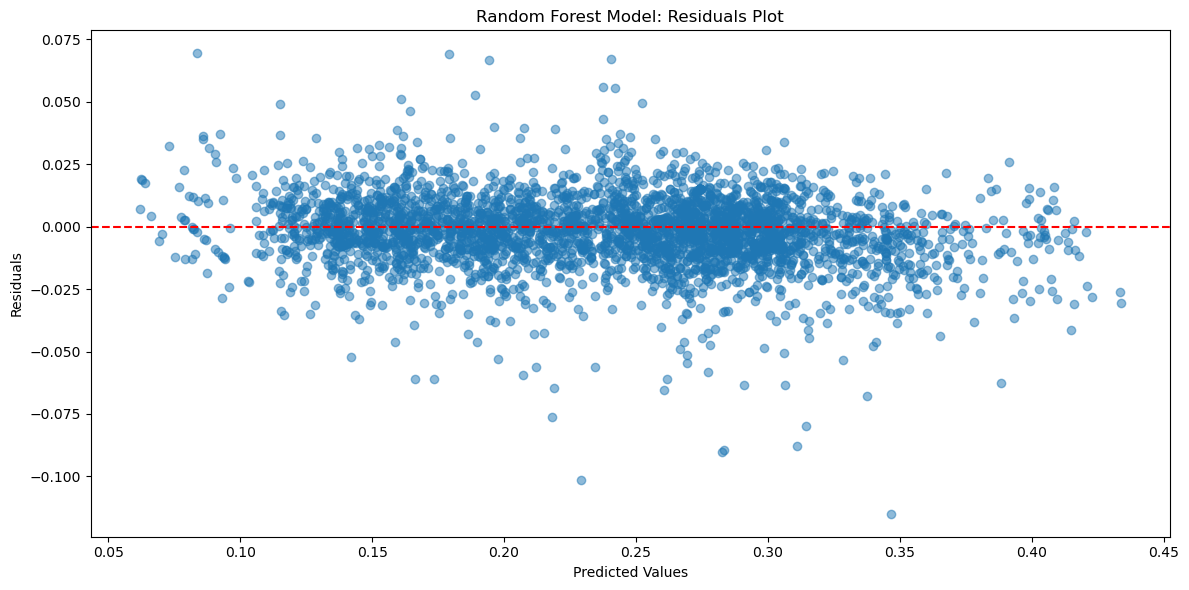

In [9]:
# Plot residuals
residuals = y_test - predictions
plt.figure(figsize=(12, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.title('Random Forest Model: Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

In [10]:
# Calculate and plot feature importance
feature_importance = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False)

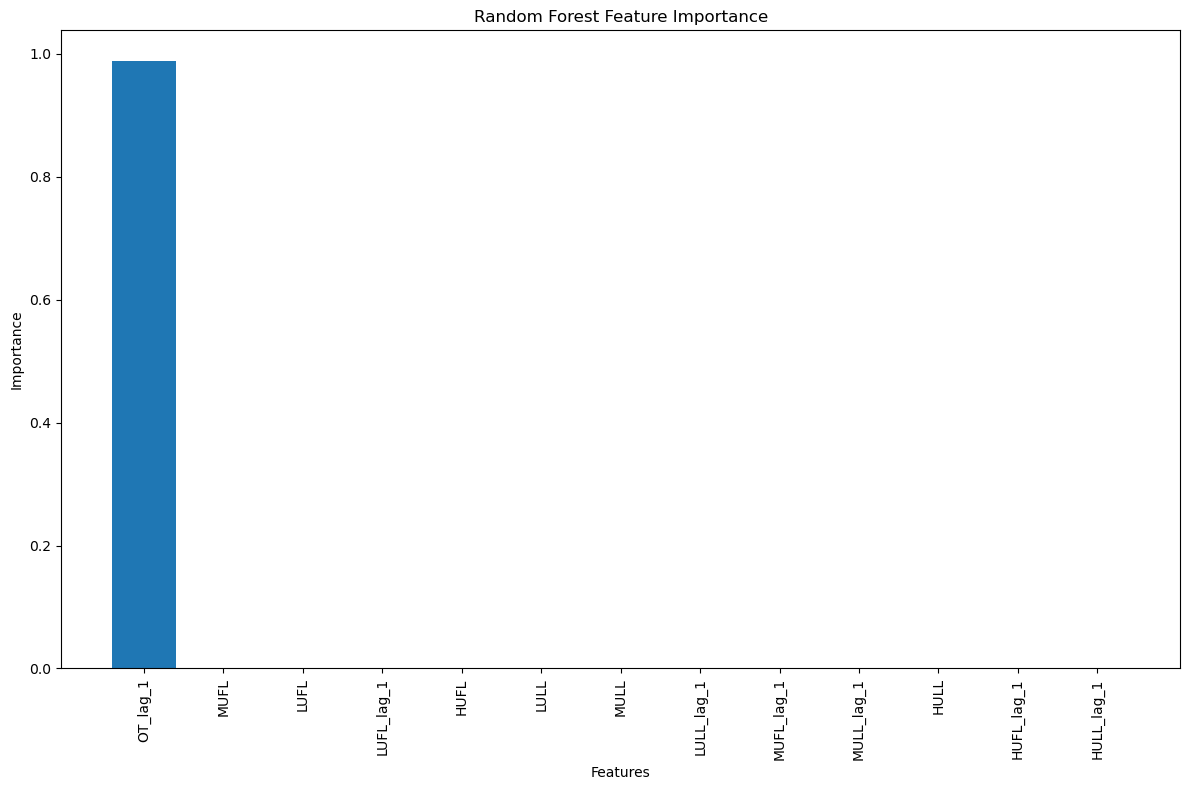

In [11]:
plt.figure(figsize=(12, 8))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()